<a href="https://colab.research.google.com/github/NicoloAvesani/project/blob/main/project_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__NICOLO' AVESANI VR490189 PROGRAMMING FINAL PROJECT 2022-2023__

I'm Nicolò Avesani, Data Science student in Verona. 
My project is focused on a dataset called 'Tourist Residences in Veneto'.

The dataset has 8504 rows and 45 columns, describing all the main characteristics of the tourist residences in Veneto (Italy), suh as the presence of: private pool, restaurant, private parking spots, staff ready to speak in several languages.

Structures are divided in 7 Districts, the so-called 'Province', which are: Belluno, Padova, Rovigo, Treviso, Venezia, Verona, Vicenza. .

The aim of my project is to find out if there is a positive correlation between the main descriptive variables and the classification of the tourist residences.

##**EDA**

In [140]:
## 1 EXPLORE THE DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

## import dataset with pandas 

tourism_structures_df = pd.read_csv('https://www.veneto.eu/static/opendata/dove-alloggiare.csv')


In [ ]:
tourism_structures_df

In [ ]:
## information of original dataset
tourism_structures_df.info()

In [143]:
## Since the majority of data are string values, so I need to transform them into boolean values with 1 for True(Vero) and 0 for False (Falso)

for i in range(len(tourism_structures_df)):
  for j in tourism_structures_df.columns:
    if (tourism_structures_df[j][i] == 'Vero') | (tourism_structures_df[j][i] == 'Falso'):
      tourism_structures_df[j] = tourism_structures_df[j].map({'Vero':1,'Falso':0}) 

In [ ]:
## Changed dataframe, descriptive variables are boolean values
tourism_structures_df

In [ ]:
## i want to see the informations of the dataset

tourism_structures_df.info()

## as i can see, the dataset has a total of 8504 entries and 45 clolumns

In [ ]:
## description of df
tourism_structures_df.describe().T

In [ ]:
## create a copy of the original dataframe in order to drop some problematic and useless columns that I will not use in my analysis.
## 'Problematic' since they have null values.

## The dropped columns are: LOCATION, SECONDARY TYPE, ADDRESS, HOUSE NUMBER, INTERNAL, ZIP CODE, PHONE, FAX, EMAIL ADDRESS, WEBSITE, AREA, LAST EDIT, IDENTIFICATION CODE.
## These columns provide useless information, since they concern only the single residential facility, and are linked to contact information. 
## The columns I am interested in are those which provide me information about the presence or not of descriptive characteristics of the tourist residences

## I also drop the following columns that, even if they provide information about descriptive characteristics, are not relevant for my purposes:
## INDOOR SWIMMING POOL, CONFERENCE ROOM, SOLARIUM, OUTSKIRTS, HILLS

tourism_df = tourism_structures_df.copy()

tourism_df = tourism_df.drop(tourism_df.columns[[2,4,6,7,8,9,10,11,12,13,14,16,19,23,35,36,42,43]],axis=1)

tourism_df.info()



In [149]:
## groupby mean to see the average number of TR by Provincia
tourism_groupby_mean = tourism_df.groupby(['PROVINCIA']).mean()

In [225]:
## try 
tourism_groupby_mean['INGLESE']

PROVINCIA
BELLUNO    0.666010
PADOVA     0.675112
ROVIGO     0.561947
TREVISO    0.617886
VENEZIA    0.796503
VERONA     0.653061
VICENZA    0.661438
Name: INGLESE, dtype: float64

In [ ]:
tourism_groupby_mean.index

In [152]:
## I want to have the classification column fill with integer values, and drop the Nan values.

classification_nan_mask = tourism_df['CLASSIFICAZIONE'].isnull()
tourism_clear_class_df = tourism_df[classification_nan_mask == False]

new_indexes = []
for i in range(len(tourism_clear_class_df)):
    new_indexes.append(i)

tourism_clear_class_df.index = new_indexes


In [153]:
## see the classification values

np.sort(tourism_clear_class_df['CLASSIFICAZIONE'].unique())

array(['1 *', '2 **', '2 Leoni', '3 ***', '3 *** SUPERIOR', '3 Leoni',
       '4 ****', '4 **** SUPERIOR', '4 Leoni', '5 *****', '5 ***** lusso',
       '5 Leoni'], dtype=object)

In [ ]:
## I create new columns relative to different class of tourist residences


class_1 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '1 *':
    class_1.append(1)
  else:
    class_1.append(0)

tourism_clear_class_df['CLASS 1'] = class_1


class_2 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '2 **':
    class_2.append(1)
  else:
    class_2.append(0)

tourism_clear_class_df['CLASS 2'] = class_2

class_2_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '2 Leoni':
    class_2_Leoni.append(1)
  else:
    class_2_Leoni.append(0)

tourism_clear_class_df['CLASS 2 Leoni'] = class_2_Leoni

class_3 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 ***' :
    class_3.append(1)
  else:
    class_3.append(0)

tourism_clear_class_df['CLASS 3'] = class_3

class_3_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 Leoni' :
    class_3_Leoni.append(1)
  else:
    class_3_Leoni.append(0)

tourism_clear_class_df['CLASS 3 Leoni'] = class_3_Leoni

class_3_sup = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '3 *** SUPERIOR' :
    class_3_sup.append(1)
  else:
    class_3_sup.append(0)

tourism_clear_class_df['CLASS 3 SUPERIOR'] = class_3_sup

class_4 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 ****':
    class_4.append(1)
  else:
    class_4.append(0)

tourism_clear_class_df['CLASS 4'] = class_4

class_4_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 Leoni' :
    class_4_Leoni.append(1)
  else:
    class_4_Leoni.append(0)

tourism_clear_class_df['CLASS 4 Leoni'] = class_4_Leoni

class_4_sup = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '4 **** SUPERIOR' :
    class_4_sup.append(1)
  else:
    class_4_sup.append(0)

tourism_clear_class_df['CLASS 4 SUPERIOR'] = class_4_sup

class_5 = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 *****':
    class_5.append(1)
  else:
    class_5.append(0)

tourism_clear_class_df['CLASS 5'] = class_5

class_5_Leoni = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 Leoni':
    class_5_Leoni.append(1)
  else:
    class_5_Leoni.append(0)

tourism_clear_class_df['CLASS 5 Leoni'] = class_5_Leoni

class_5_luxury = []

for i in range(len(tourism_clear_class_df)):
  if tourism_clear_class_df['CLASSIFICAZIONE'][i] == '5 ***** lusso':
    class_5_luxury.append(1)
  else:
    class_5_luxury.append(0)

tourism_clear_class_df['CLASS 5 LUXURY'] = class_5_luxury


## I also create an all lenguages column in which I will have 1 if the tourist residence speak all 4 lenguages

languages = []

for i in range(len(tourism_clear_class_df)):
    if (tourism_clear_class_df.loc[i, 'INGLESE'] == 1) & (tourism_clear_class_df.loc[i, 'TEDESCO'] == 1) & (tourism_clear_class_df.loc[i, 'FRANCESE'] == 1) & (tourism_clear_class_df.loc[i, 'SPAGNOLO'] == 1):
        languages.append(1)
    else:
        languages.append(0)

tourism_clear_class_df['LANGUAGES'] = languages

In [ ]:
## check the info
tourism_clear_class_df.info()

In [ ]:
## no more null values in classification
tourism_clear_class_df

In [ ]:
## mean of TR by Provincia 
tourism_clear_class_groupby_mean = tourism_clear_class_df.groupby(['PROVINCIA']).mean()
tourism_clear_class_groupby_mean.T

In [ ]:
tourism_clear_class_groupby_mean['TEDESCO']

In [ ]:
tourism_clear_class_groupby_mean['CLASS 2 Leoni']

In [ ]:
## Now I can understand how many tourist residences by provincia has the characteristics in index

tourism_clear_class_groupby_sum = tourism_clear_class_df.groupby(['PROVINCIA']).sum()

tourism_clear_class_groupby_sum.T

In [161]:
## I create masks and df for every provincia

belluno_mask = tourism_clear_class_df['PROVINCIA'] == 'BELLUNO'
belluno_df = tourism_clear_class_df[belluno_mask]

padova_mask = tourism_clear_class_df['PROVINCIA'] == 'PADOVA'
padova_df = tourism_clear_class_df[padova_mask]

rovigo_mask = tourism_clear_class_df['PROVINCIA'] == 'ROVIGO'
rovigo_df = tourism_clear_class_df[rovigo_mask]

treviso_mask = tourism_clear_class_df['PROVINCIA'] == 'TREVISO'
treviso_df = tourism_clear_class_df[treviso_mask]

venezia_mask = tourism_clear_class_df['PROVINCIA'] == 'VENEZIA'
venezia_df = tourism_clear_class_df[venezia_mask]

verona_mask = tourism_clear_class_df['PROVINCIA'] == 'VERONA'
verona_df = tourism_clear_class_df[verona_mask]

vicenza_mask = tourism_clear_class_df['PROVINCIA'] == 'VICENZA'
vicenza_df = tourism_clear_class_df[vicenza_mask]

In [162]:
## length of the dfs that I have just created gives me the number of tourist residences by provincia

belluno_tr = len(belluno_df)

padova_tr = len(padova_df)

treviso_tr = len(treviso_df)

rovigo_tr = len(rovigo_df)

venezia_tr = len(venezia_df)

verona_tr = len(verona_df)

vicenza_tr = len(vicenza_df)

city_len = [belluno_tr , padova_tr, treviso_tr, rovigo_tr, venezia_tr, verona_tr, vicenza_tr]

In [163]:
city_len

[825, 553, 555, 178, 2570, 2024, 632]

In [164]:
## verify that there is no mistakes

len(tourism_clear_class_df) == belluno_tr + padova_tr + treviso_tr + rovigo_tr + venezia_tr + verona_tr + vicenza_tr

True

In [165]:
## descriptive data

belluno_descriptive = tourism_clear_class_groupby_sum.T['BELLUNO']
padova_descriptive = tourism_clear_class_groupby_sum.T['PADOVA']
treviso_descriptive = tourism_clear_class_groupby_sum.T['TREVISO']
rovigo_descriptive = tourism_clear_class_groupby_sum.T['ROVIGO']
venezia_descriptive = tourism_clear_class_groupby_sum.T['VENEZIA']
verona_descriptive = tourism_clear_class_groupby_sum.T['VERONA']
vicenza_descriptive = tourism_clear_class_groupby_sum.T['VICENZA']

city_list = [belluno_descriptive, padova_descriptive, treviso_descriptive, rovigo_descriptive, venezia_descriptive, verona_descriptive, vicenza_descriptive]


In [166]:
city_len

[825, 553, 555, 178, 2570, 2024, 632]

##**PLOTS** 

In [ ]:
## PLOTS

In [ ]:
## Firstly, I want to plot how many TR by Provincia

len_prov = {'BELLUNO':825, 'PADOVA':553, 'TREVISO':555, 'ROVIGO':178, 'VENEZIA':2570, 'VERONA':2024, 'VICENZA':632}
len_prov = pd.Series(len_prov)
len_prov_df = pd.DataFrame(len_prov)
len_prov_df.columns = ['# TR']
len_prov_df

In [ ]:
## which provincia has the higher number of TR?


province = [
    'BELLUNO',
    'PADOVA',
    'TREVISO',
    'ROVIGO',
    'VENEZIA',
    'VERONA',
    'VICENZA'
]

plt.figure(figsize=(10,10))
plt.title('TR by Provincia')
for i in range(len(city_list)):
  plt.bar(province[i], city_len[i])
  plt.text(province[i], city_len[i], str(city_len[i]), ha='center', weight='bold')

In [169]:
## I use folium to plot see the map with the geographical location of Province

import folium

city_coordinates = {
    'Belluno': [46.13, 12.21],
    'Padova': [45.40, 11.87],
    'Rovigo': [45.17, 11.80],
    'Treviso': [45.66, 12.24],
    'Venezia': [45.44, 12.33],
    'Verona': [45.44, 10.99],
    'Vicenza': [45.55, 11.54]
}

# Create the map centered on the average latitude and longitude
mean_lat = sum(coord[0] for coord in city_coordinates.values()) / len(city_coordinates)
mean_lon = sum(coord[1] for coord in city_coordinates.values()) / len(city_coordinates)

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=8)

# Add markers for each city
for city, coord in city_coordinates.items():
    folium.Marker(coord, popup=city).add_to(m)

m.save('map.html')

from IPython.display import display
display(m)

In [170]:
## coordinates 

city_coordinates = {
    'Belluno': [46.13, 12.21],
    'Padova': [45.40, 11.87],
    'Rovigo': [45.17, 11.80],
    'Treviso': [45.66, 12.24],
    'Venezia': [45.44, 12.33],
    'Verona': [45.44, 10.99],
    'Vicenza': [45.55, 11.54]
}
city_df_map = pd.DataFrame(city_coordinates).T
city_df_map.columns = ['LAT','LON']
city_df_map

,LAT,LON
Belluno,46.13,12.21
Padova,45.40,11.87
Rovigo,45.17,11.80
Treviso,45.66,12.24
Venezia,45.44,12.33
Verona,45.44,10.99
Vicenza,45.55,11.54


What Provincia do you want to analyze? (digit a provincia among these: BELLUNO, PADOVA, TREVISO, ROVIGO, VENEZIA, VERONA, VICENZA)verona


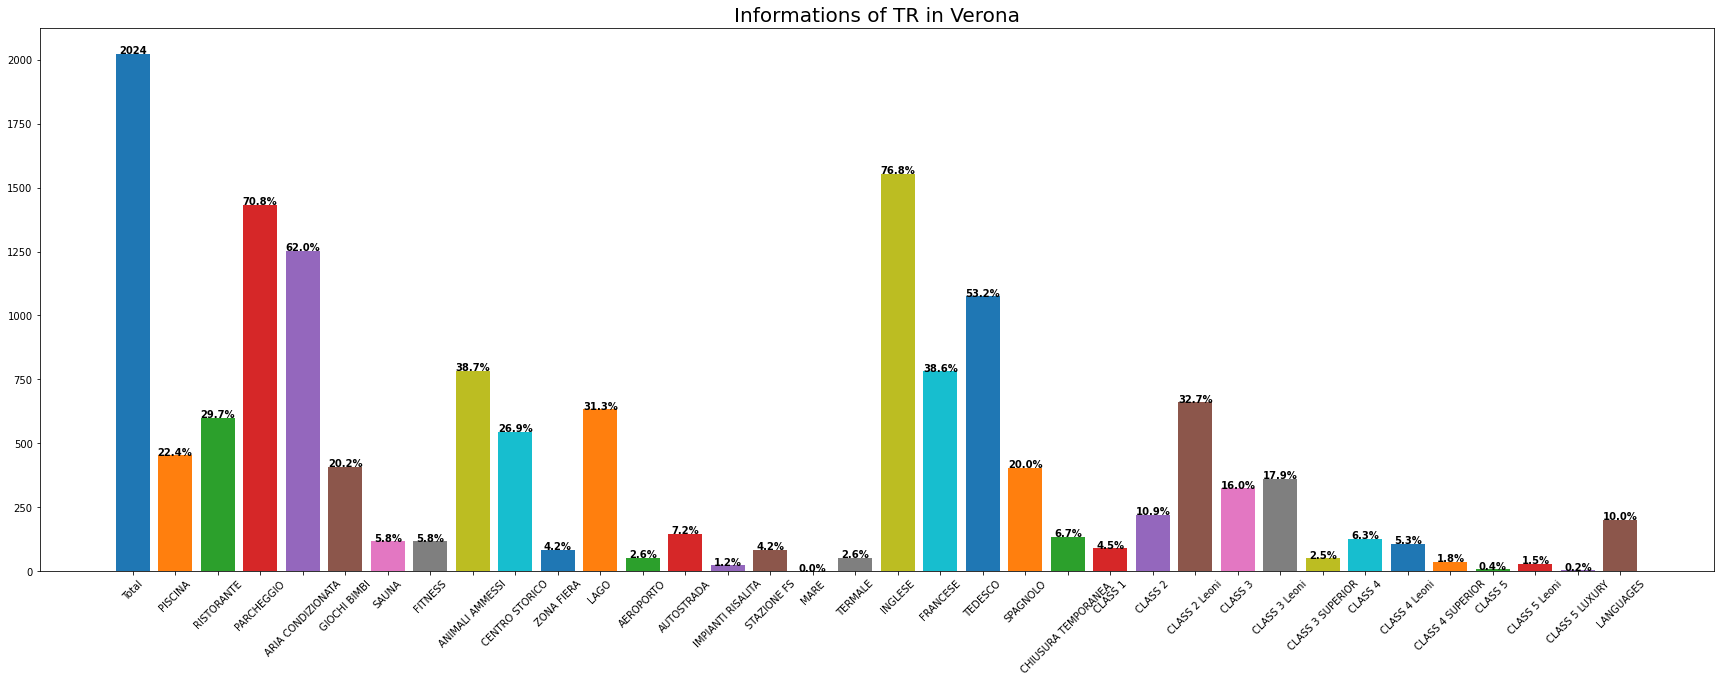

In [171]:
## tourist residences with every characteristic and percentage by provincia 

plt.figure(figsize=(30,10))



city = input('What Provincia do you want to analyze? (digit a provincia among these: BELLUNO, PADOVA, TREVISO, ROVIGO, VENEZIA, VERONA, VICENZA)').upper()

if city == 'BELLUNO':
  plt.title('Informations of TR in Belluno', fontsize= 20)
  plt.bar('Total', city_len[0])
  plt.text('Total',city_len[0], str(city_len[0]), ha='center', weight='bold')
  for i in range(len(belluno_descriptive)):
    plt.bar(belluno_descriptive.index[i], belluno_descriptive[i])
    plt.xticks(rotation=45)
    number = round((belluno_descriptive[i]/belluno_tr)*100,1)
    plt.text(belluno_descriptive.index[i], belluno_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  

elif city == 'PADOVA':
  plt.title('Informations of TR in Padova', fontsize= 20)
  plt.bar('Total', city_len[1])
  plt.text('Total',city_len[1], str(city_len[1]), ha='center', weight='bold')
  for i in range(len(padova_descriptive)):
    plt.bar(padova_descriptive.index[i], padova_descriptive[i])
    plt.xticks(rotation=45)
    number = round((padova_descriptive[i]/padova_tr)*100,1)
    plt.text(padova_descriptive.index[i], padova_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  

elif city == 'TREVISO':
  plt.title('Informations of TR in Treviso', fontsize= 20)
  plt.bar('Total', city_len[2])
  plt.text('Total',city_len[2], str(city_len[2]), ha='center', weight='bold')
  for i in range(len(treviso_descriptive)):
    plt.bar(treviso_descriptive.index[i], treviso_descriptive[i])
    plt.xticks(rotation=45)
    number = round((treviso_descriptive[i]/treviso_tr)*100,1)
    plt.text(treviso_descriptive.index[i], treviso_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
  
    
elif city == 'ROVIGO':
  plt.title('Informations of TR in Rovigo', fontsize= 20)
  plt.bar('Total', city_len[3])
  plt.text('Total',city_len[3], str(city_len[3]), ha='center', weight='bold')
  for i in range(len(rovigo_descriptive)):
    plt.bar(rovigo_descriptive.index[i], rovigo_descriptive[i])
    plt.xticks(rotation=45)
    number = round((rovigo_descriptive[i]/rovigo_tr)*100,1)
    plt.text(rovigo_descriptive.index[i], rovigo_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    

elif city == 'VENEZIA':
  plt.title('Informations of TR in Venezia', fontsize= 20)
  plt.bar('Total', city_len[4])
  plt.text('Total',city_len[4], str(city_len[4]), ha='center', weight='bold')
  for i in range(len(venezia_descriptive)):
    plt.bar(venezia_descriptive.index[i], venezia_descriptive[i])
    plt.xticks(rotation=45)
    number = round((venezia_descriptive[i]/venezia_tr)*100,1)
    plt.text(venezia_descriptive.index[i], venezia_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    

elif city == 'VERONA':
  plt.title('Informations of TR in Verona', fontsize= 20)
  plt.bar('Total', city_len[5])
  plt.text('Total',city_len[5], str(city_len[5]), ha='center', weight='bold')
  for i in range(len(verona_descriptive)):
    plt.bar(verona_descriptive.index[i], verona_descriptive[i])
    plt.xticks(rotation=45)
    number = round((verona_descriptive[i]/verona_tr)*100,1)
    plt.text(verona_descriptive.index[i], verona_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
   

elif city == 'VICENZA':
  plt.title('Informations of TR in Vicenza', fontsize= 20)
  plt.bar('Total', city_len[6])
  plt.text('Total',city_len[6], str(city_len[6]), ha='center', weight='bold')
  for i in range(len(vicenza_descriptive)):
    plt.bar(vicenza_descriptive.index[i], vicenza_descriptive[i])
    plt.xticks(rotation=45)
    number = round((vicenza_descriptive[i]/vicenza_tr)*100,1)
    plt.text(vicenza_descriptive.index[i], vicenza_descriptive[i], str(number)+'%', ha='center', weight='bold')
    
    
  
else:
  print('Provincia not found')
  
  plt.show()





In [172]:
## The aim of the project is to analyze the main characteristics of tourist residences in Veneto, 
## find if there exist a correlation between these characteristics and the classification of the residences, 
## and understand how the coefficients in the linear regression change by increasing the classification of residences.

## Firstly, I analyze the presence of the following characterisics in TR:

## PET-FRIENDLY
## POOL
## AIR CONDITIONING
## RESTAURANT
## ENGLISH
## ALL 4 LENGUAGES (ENGLISH, SPANISH, GERMAN, FRENCH)


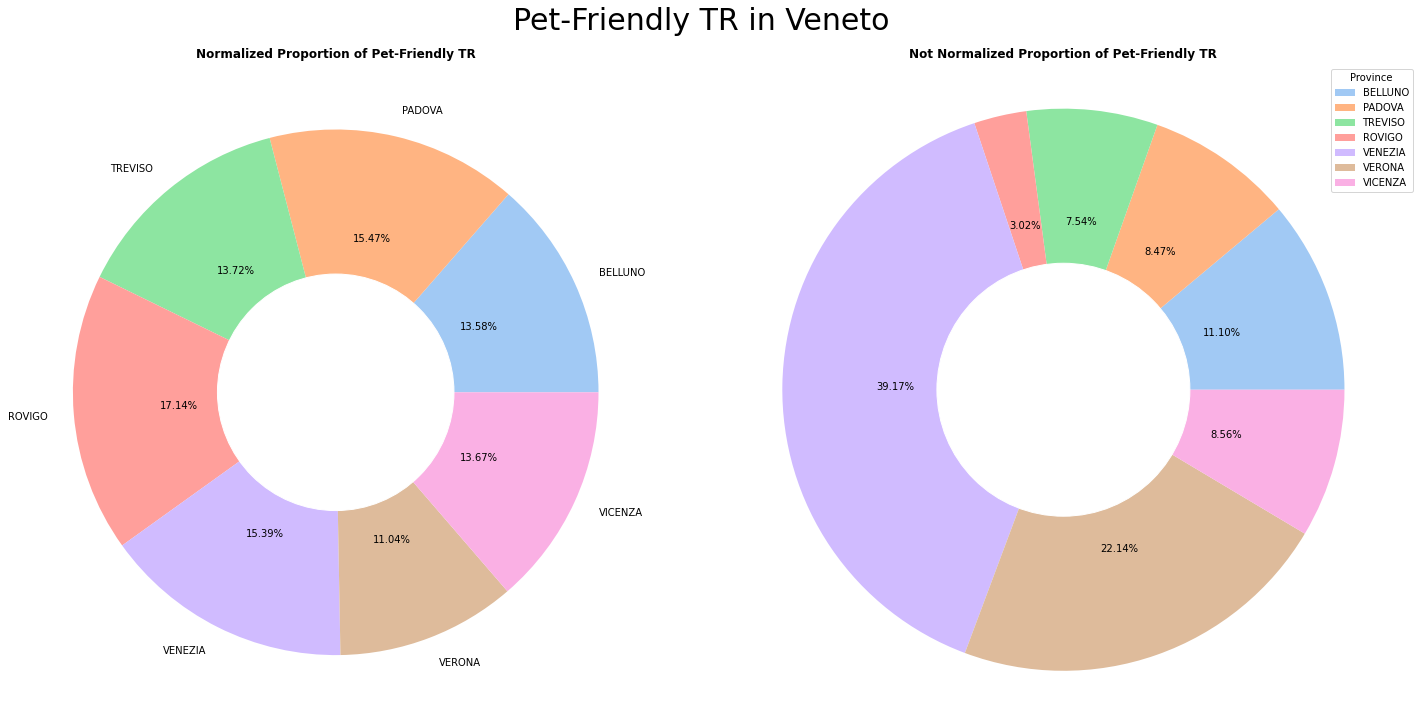

In [173]:
## PET-FRIENDLY
## Definition of Pet-Friendly:
## Animal friendly tourist residences are accommodations that are:
## designed and managed to be welcoming and accommodating to both human guests and their animal companions.
## This may include features such as designated pet-friendly rooms or areas, 
## easy access to outdoor spaces for exercise and relief, and possibly even on-site pet services such as grooming or boarding.

## animal friendly pie charts

from sklearn import preprocessing

## 1 normalizing the number of animal-friendly tr

belluno_af_tr = belluno_descriptive.loc['ANIMALI AMMESSI']
padova_af_tr = padova_descriptive.loc['ANIMALI AMMESSI']
treviso_af_tr = treviso_descriptive.loc['ANIMALI AMMESSI']
rovigo_af_tr = rovigo_descriptive.loc['ANIMALI AMMESSI']
venezia_af_tr = venezia_descriptive.loc['ANIMALI AMMESSI']
verona_af_tr = verona_descriptive.loc['ANIMALI AMMESSI']
vicenza_af_tr = vicenza_descriptive.loc['ANIMALI AMMESSI']

## create an array with ratio of Pet-friendly TR by provincia and normalize the array
## the normalization gives me information on the weight that the number of PF TR has compared to the other provinces
af_array_1 = np.array([belluno_af_tr/belluno_tr, padova_af_tr/padova_tr, treviso_af_tr/treviso_tr, rovigo_af_tr/rovigo_tr, venezia_af_tr/venezia_tr, verona_af_tr/verona_tr, vicenza_af_tr/vicenza_tr])
af_array_1.reshape(7,1)
normalized_arr_1 = np.array(preprocessing.normalize(af_array_1[np.newaxis]))

## create an array with the number of PF TR by provincia
af_array_2 = np.array([belluno_af_tr, padova_af_tr, treviso_af_tr, rovigo_af_tr, venezia_af_tr, verona_af_tr, vicenza_af_tr])
af_array_2.reshape(7,1)
normalized_arr_2 = np.array(preprocessing.normalize(af_array_2[np.newaxis]))

## Pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## change into 1 dimensional array
data_1 = normalized_arr_1.flatten()
data_2 = normalized_arr_2.flatten()


labels = province

axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of Pet-Friendly TR", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of Pet-Friendly TR", fontweight='bold')

fig.suptitle("Pet-Friendly TR in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

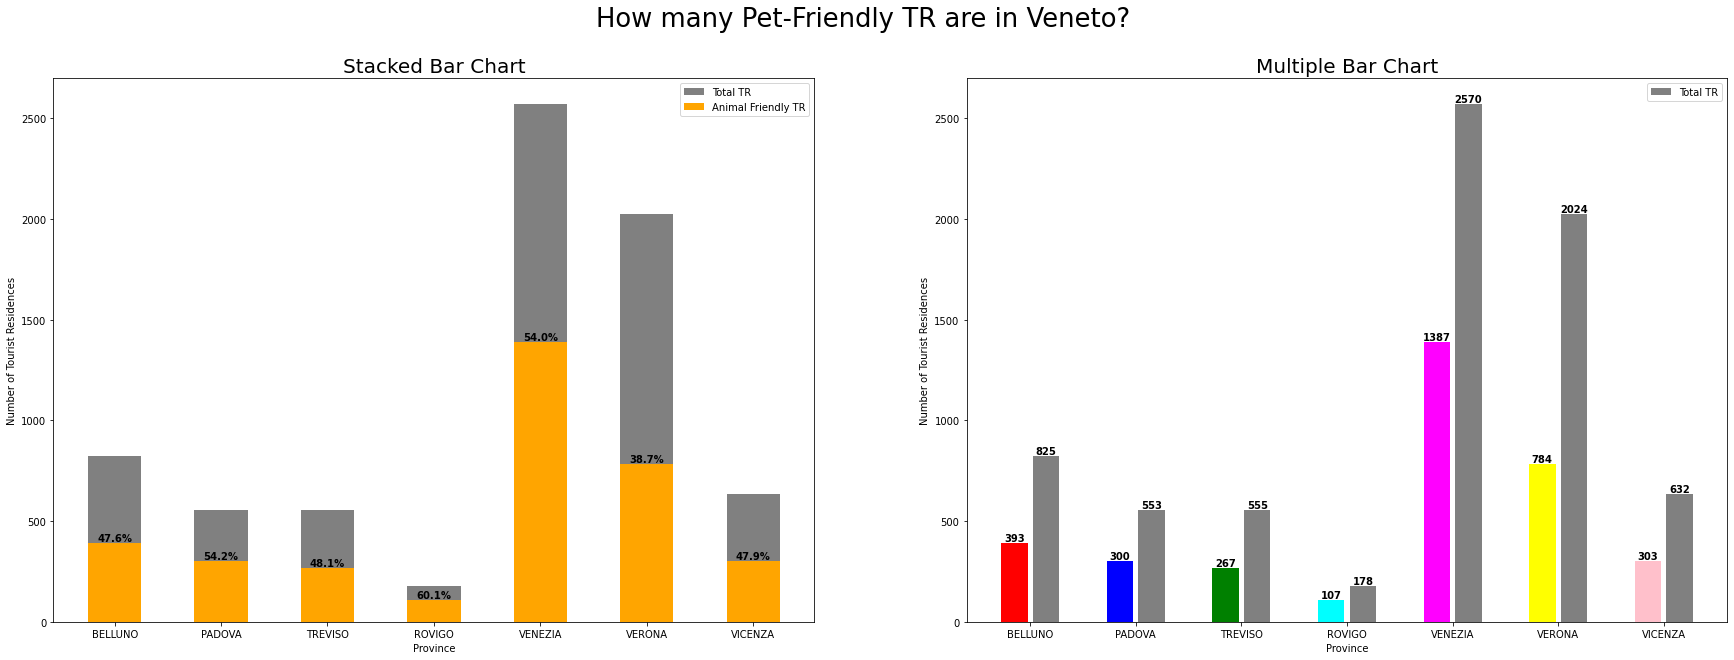

In [175]:
## Bar Charts

animal_friendly_list=[belluno_af_tr, padova_af_tr, treviso_af_tr, rovigo_af_tr, venezia_af_tr, verona_af_tr, vicenza_af_tr]

## Stacked Bar Chart
fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many Pet-Friendly TR are in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(animal_friendly_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], animal_friendly_list[i], color='orange', width = 0.5, label='Animal Friendly TR')
    number=round((animal_friendly_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], animal_friendly_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## Multiple bar chart)

X=np.arange(7)

list_of_colors=[
'red',
'blue',
'green',
'cyan',
'magenta',
'yellow',
'pink']

data = [city_len, animal_friendly_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((animal_friendly_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()


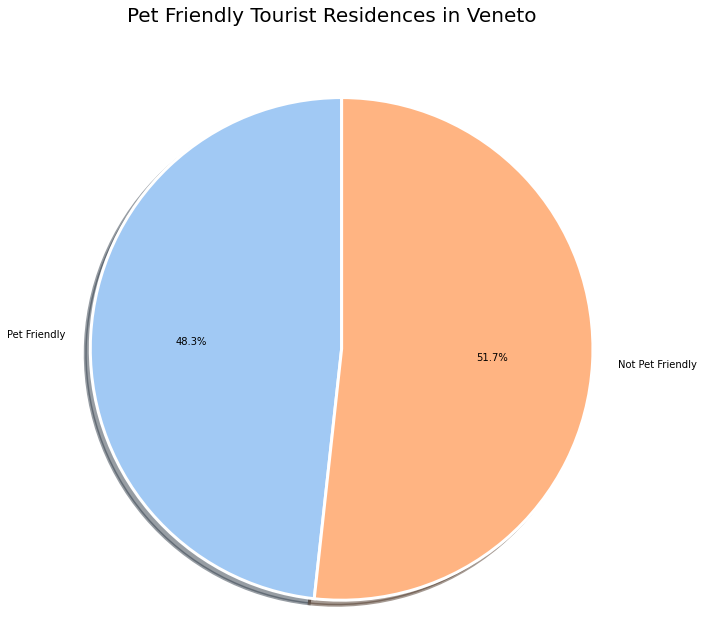

In [176]:
## How many tourist residences are pet-friendly in Veneto?

sum_pf = np.sum(animal_friendly_list)
total_tr = np.sum(city_len)

## ratio of pet-friendly tr in Veneto

ratio_af_tr = sum_pf/total_tr

## create a pie chart with the pf tourist residences and the not pf tourist residences in Veneto

labels = ['Pet Friendly', 'Not Pet Friendly']
sizes = [ratio_af_tr, 1 - ratio_af_tr]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Pet Friendly Tourist Residences in Veneto", fontsize=20)

plt.show()


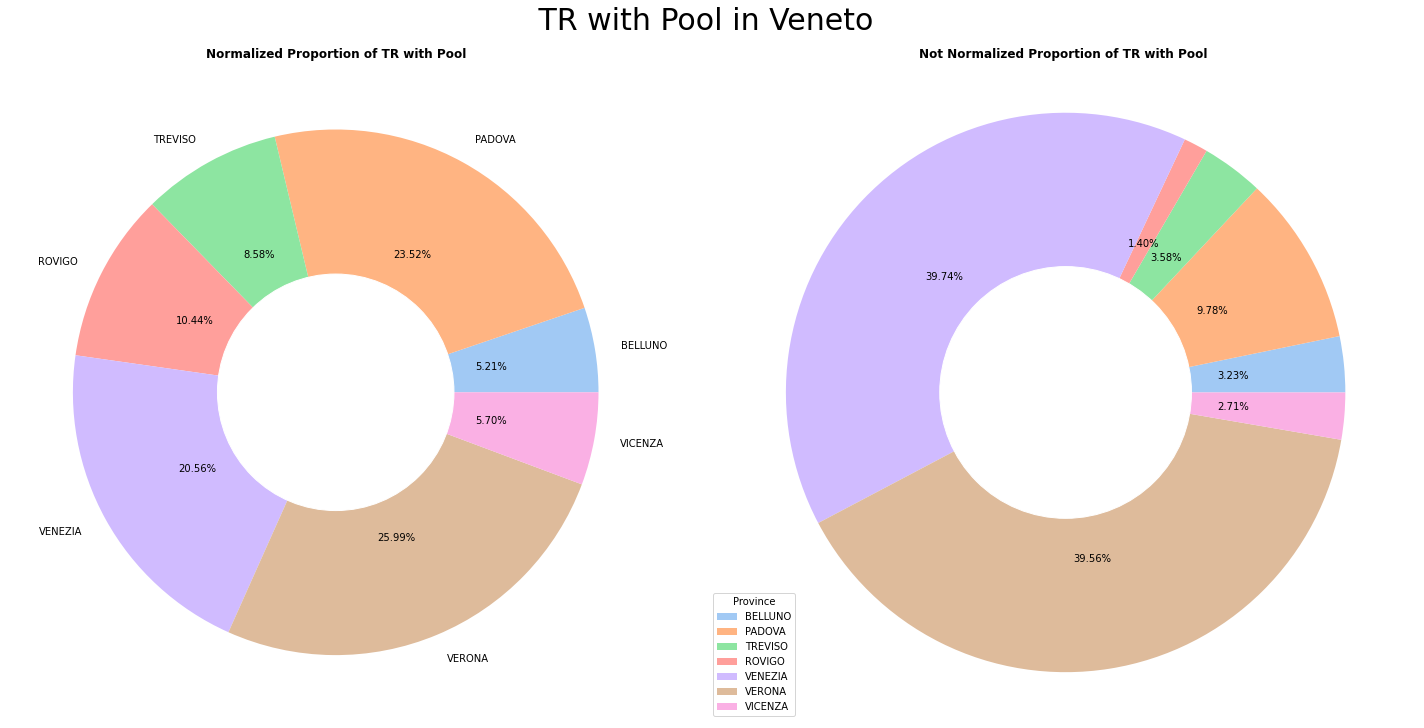

In [177]:
## POOL 
## Definition of Pool:
## Tourist residences with pool refers to accomodation that have a swimming pool on the property. 
## These types of properties are popular among tourists and vacationers who are looking for a place to stay that offers the convenience and luxury of having a pool to swim in during their stay. 

belluno_pool_tr = belluno_descriptive.loc['PISCINA']
padova_pool_tr = padova_descriptive.loc['PISCINA']
treviso_pool_tr = treviso_descriptive.loc['PISCINA']
rovigo_pool_tr = rovigo_descriptive.loc['PISCINA']
venezia_pool_tr = venezia_descriptive.loc['PISCINA']
verona_pool_tr = verona_descriptive.loc['PISCINA']
vicenza_pool_tr = vicenza_descriptive.loc['PISCINA']

## array with ratio of pool tr and total tr by provincia
pool_array_1 = np.array([belluno_pool_tr/belluno_tr, padova_pool_tr/padova_tr, treviso_pool_tr/treviso_tr, rovigo_pool_tr/rovigo_tr, venezia_pool_tr/venezia_tr, verona_pool_tr/verona_tr, vicenza_pool_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(pool_array_1[np.newaxis])

## array with number of pool by provincia
pool_array_2 = np.array([belluno_pool_tr, padova_pool_tr, treviso_pool_tr, rovigo_pool_tr, venezia_pool_tr, verona_pool_tr, vicenza_pool_tr])
normalized_arr_2 = preprocessing.normalize(pool_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR with Pool by provincia
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR with Pool", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR with Pool in Veneto (Total number of TR with Pool)
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR with Pool", fontweight='bold')

fig.suptitle(" TR with Pool in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

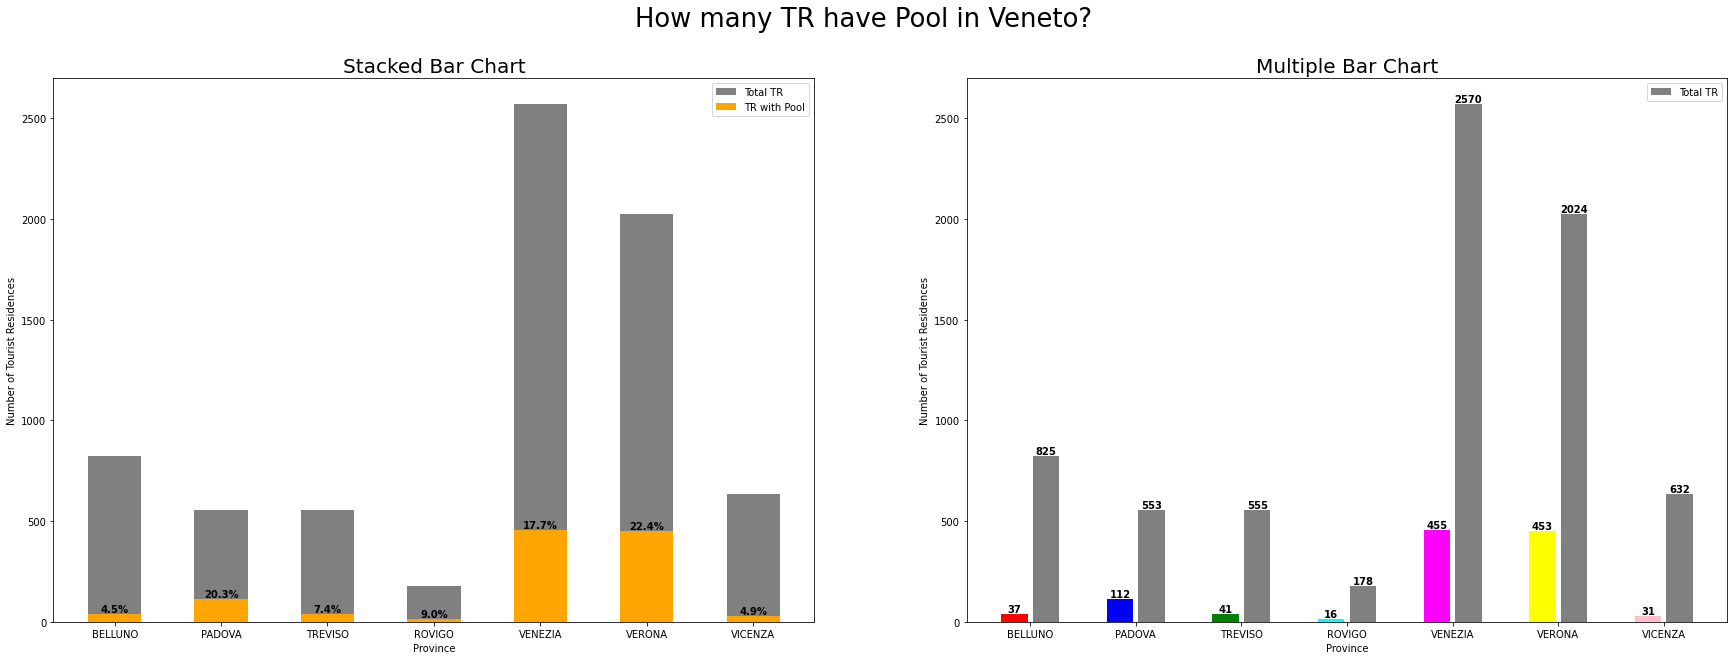

In [178]:
## Stacked and Multiple Bar Charts

## Stacked
pool_list=[belluno_pool_tr, padova_pool_tr, treviso_pool_tr, rovigo_pool_tr, venezia_pool_tr, verona_pool_tr, vicenza_pool_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR have Pool in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(pool_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], pool_list[i], color='orange', width = 0.5, label='TR with Pool')
    number=round((pool_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], pool_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, pool_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((pool_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

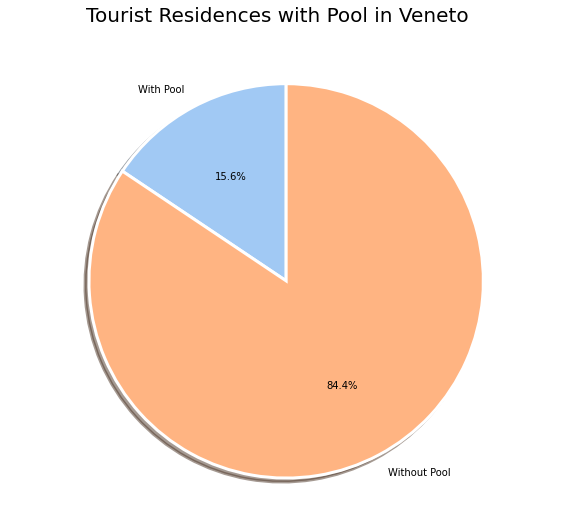

In [179]:
## How many tourist residences have Pool in Veneto?

sum_pool = np.sum(pool_list)
total_tr = np.sum(city_len)

## ratio of tr with pool in Veneto

ratio_pool_tr = sum_pool/total_tr

## create a pie chart with the tourist residences with pool and the not with pool tourist residences in Veneto

labels = ['With Pool', 'Without Pool']
sizes = [ratio_pool_tr, 1 - ratio_pool_tr]

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences with Pool in Veneto", fontsize=20)

plt.show()

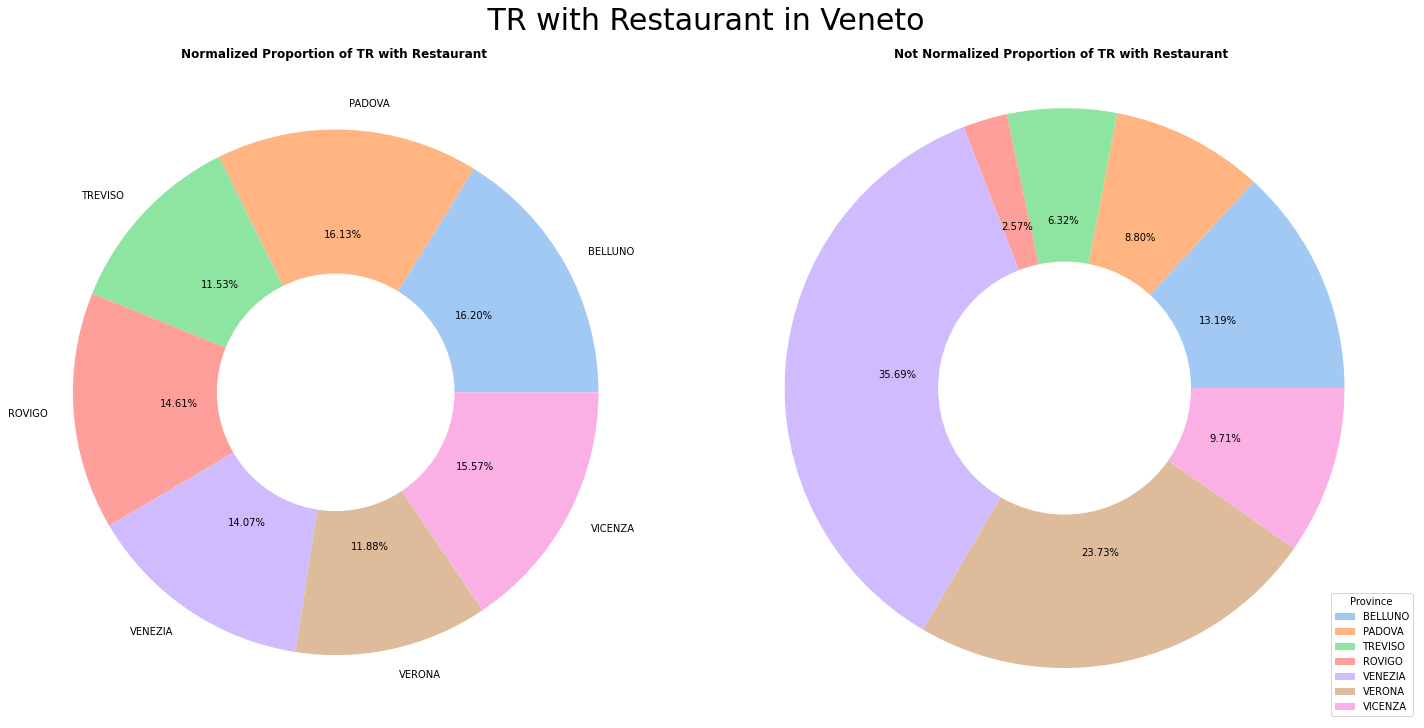

In [180]:
## RESTAURANT
## Definition of Restaurant:
## Tourist residences with a restaurant refers to accomodations that have an on-site restaurant. 
## These types of properties are popular among tourists and vacationers who are looking for a place to stay that offers the convenience of having a restaurant where they can enjoy meals during their stay.
## The restaurant can be a shared space, or a private space that is only accessible to guests staying in the residence.


belluno_rest_tr = belluno_descriptive.loc['RISTORANTE']
padova_rest_tr = padova_descriptive.loc['RISTORANTE']
treviso_rest_tr = treviso_descriptive.loc['RISTORANTE']
rovigo_rest_tr = rovigo_descriptive.loc['RISTORANTE']
venezia_rest_tr = venezia_descriptive.loc['RISTORANTE']
verona_rest_tr = verona_descriptive.loc['RISTORANTE']
vicenza_rest_tr = vicenza_descriptive.loc['RISTORANTE']

## array with ratio of tr with restaurant and total tr by provincia
rest_array_1 = np.array([belluno_rest_tr/belluno_tr, padova_rest_tr/padova_tr, treviso_rest_tr/treviso_tr, rovigo_rest_tr/rovigo_tr, venezia_rest_tr/venezia_tr, verona_rest_tr/verona_tr, vicenza_rest_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(rest_array_1[np.newaxis])

## array with number of tr with restaurant by provincia
rest_array_2 = np.array([belluno_rest_tr, padova_rest_tr, treviso_rest_tr, rovigo_rest_tr, venezia_rest_tr, verona_rest_tr, vicenza_rest_tr])
normalized_arr_2 = preprocessing.normalize(rest_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR with Restaurant by provincia
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR with Restaurant ", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR with restaurant in Veneto (Total number of TR with Restaurant)
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR with Restaurant ", fontweight='bold')

fig.suptitle(" TR with Restaurant in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

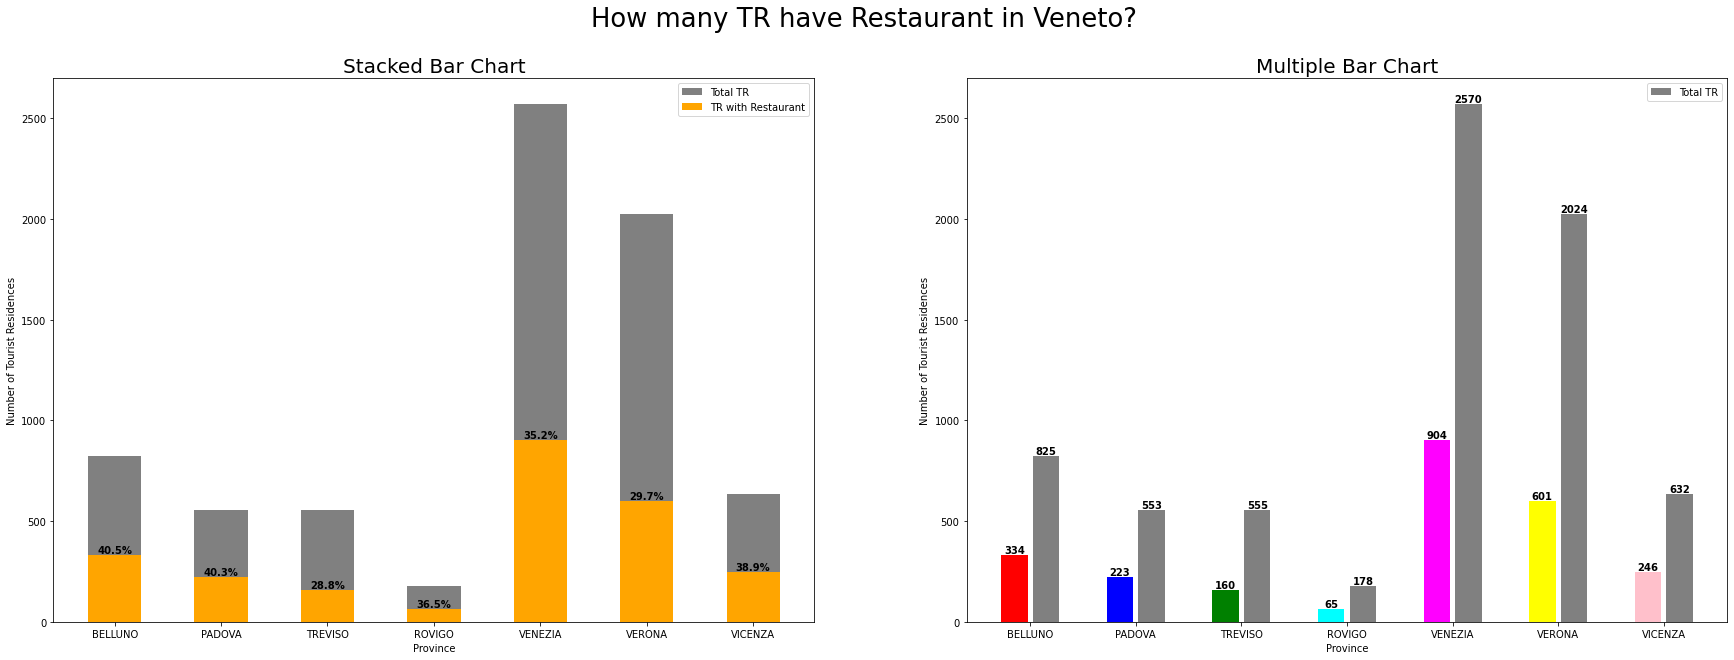

In [181]:
rest_list=[belluno_rest_tr, padova_rest_tr, treviso_rest_tr, rovigo_rest_tr, venezia_rest_tr, verona_rest_tr, vicenza_rest_tr]

## Stacked Bar Chart

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR have Restaurant in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(rest_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], rest_list[i], color='orange', width = 0.5, label='TR with Restaurant')
    number=round((rest_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], rest_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, rest_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((rest_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

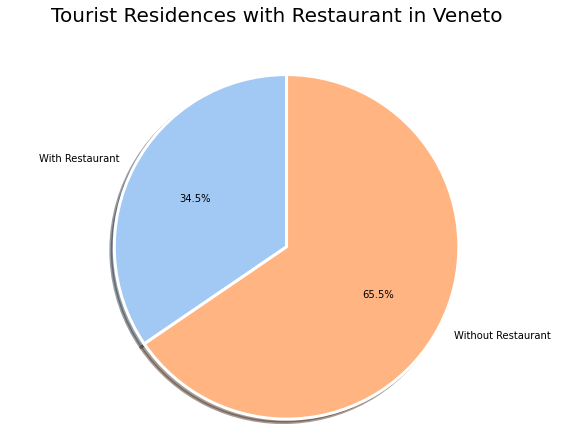

In [182]:
## How many tourist residences have Restaurant in Veneto?

sum_rest = np.sum(rest_list)
total_tr = np.sum(city_len)

## ratio of tr with restaurant in Veneto

ratio_rest_tr = sum_rest/total_tr

## create a pie chart with the tourist residences with restaurant and without in Veneto

labels = ['With Restaurant', 'Without Restaurant']
sizes = [ratio_rest_tr, 1 - ratio_rest_tr]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences with Restaurant in Veneto", fontsize=20)

plt.show()

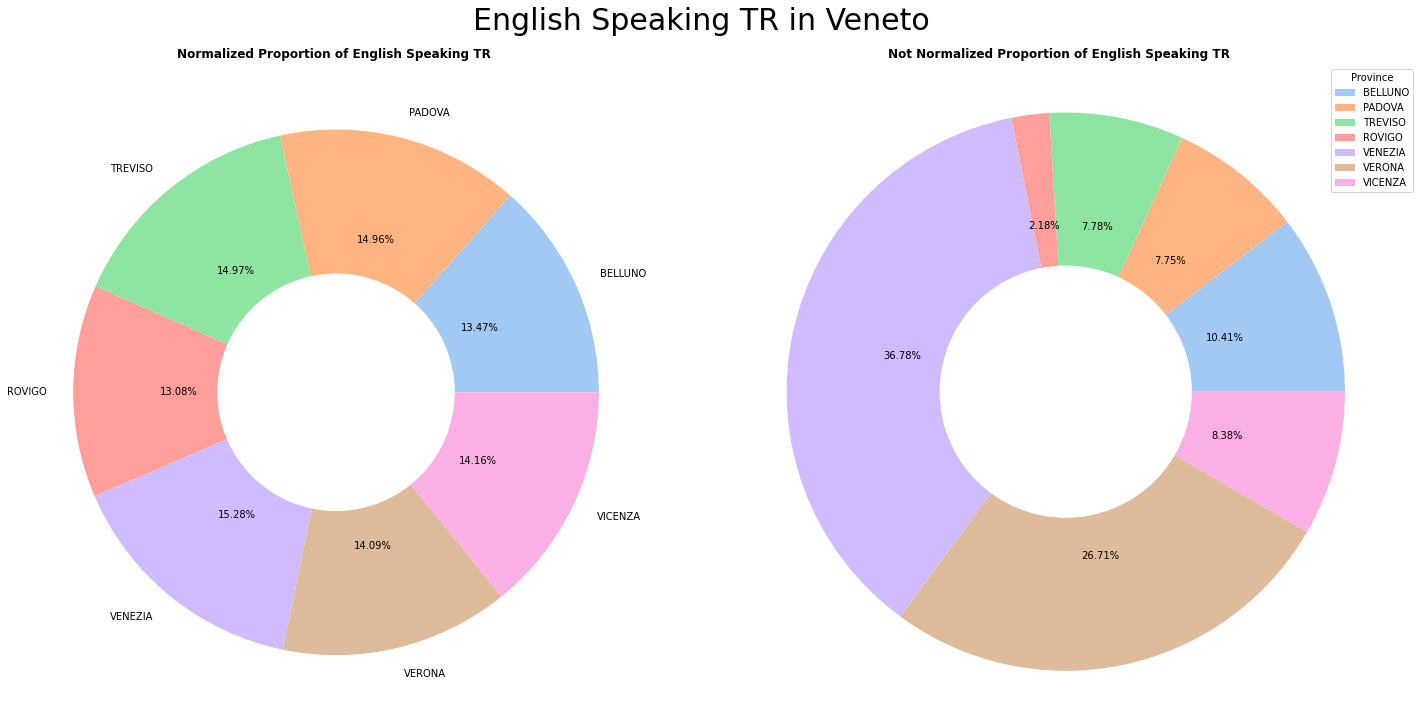

In [227]:
## ENGLISH 
## Definition of English:
## Tourist residences that speak English refer to accomodations where the staff or management can communicate effectively in English with the guests.
## These types of properties are popular among tourists and vacationers who primarily speak English and may not be fluent in the local language. 
## This can include properties where the front-desk staff, housekeeping, maintenance, and other staff members are able to speak and understand English, as well as properties where the majority of guests are English-speaking. 
## Some tourist residences may also provide written information or signage in English to help guests navigate their stay. 
## These type of tourist residences are a great option for travelers who are visiting a foreign country and want to feel comfortable and well-informed during their stay.

belluno_eng_tr = belluno_descriptive.loc['INGLESE']
padova_eng_tr = padova_descriptive.loc['INGLESE']
treviso_eng_tr = treviso_descriptive.loc['INGLESE']
rovigo_eng_tr = rovigo_descriptive.loc['INGLESE']
venezia_eng_tr = venezia_descriptive.loc['INGLESE']
verona_eng_tr = verona_descriptive.loc['INGLESE']
vicenza_eng_tr = vicenza_descriptive.loc['INGLESE']

## array with ratio of engish speaking tr and total tr by provincia
eng_array_1 = np.array([belluno_eng_tr/belluno_tr, padova_eng_tr/padova_tr, treviso_eng_tr/treviso_tr, rovigo_eng_tr/rovigo_tr, venezia_eng_tr/venezia_tr, verona_eng_tr/verona_tr, vicenza_eng_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(eng_array_1[np.newaxis])

## array with number of english speaking by provincia
eng_array_2 = np.array([belluno_eng_tr, padova_eng_tr, treviso_eng_tr, rovigo_eng_tr, venezia_eng_tr, verona_eng_tr, vicenza_eng_tr])
normalized_arr_2 = preprocessing.normalize(eng_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR speaking english by provincia
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of English Speaking TR ", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR  (Total number of TR speaking enlish)
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of English Speaking TR  ", fontweight='bold')

fig.suptitle("English Speaking TR in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()


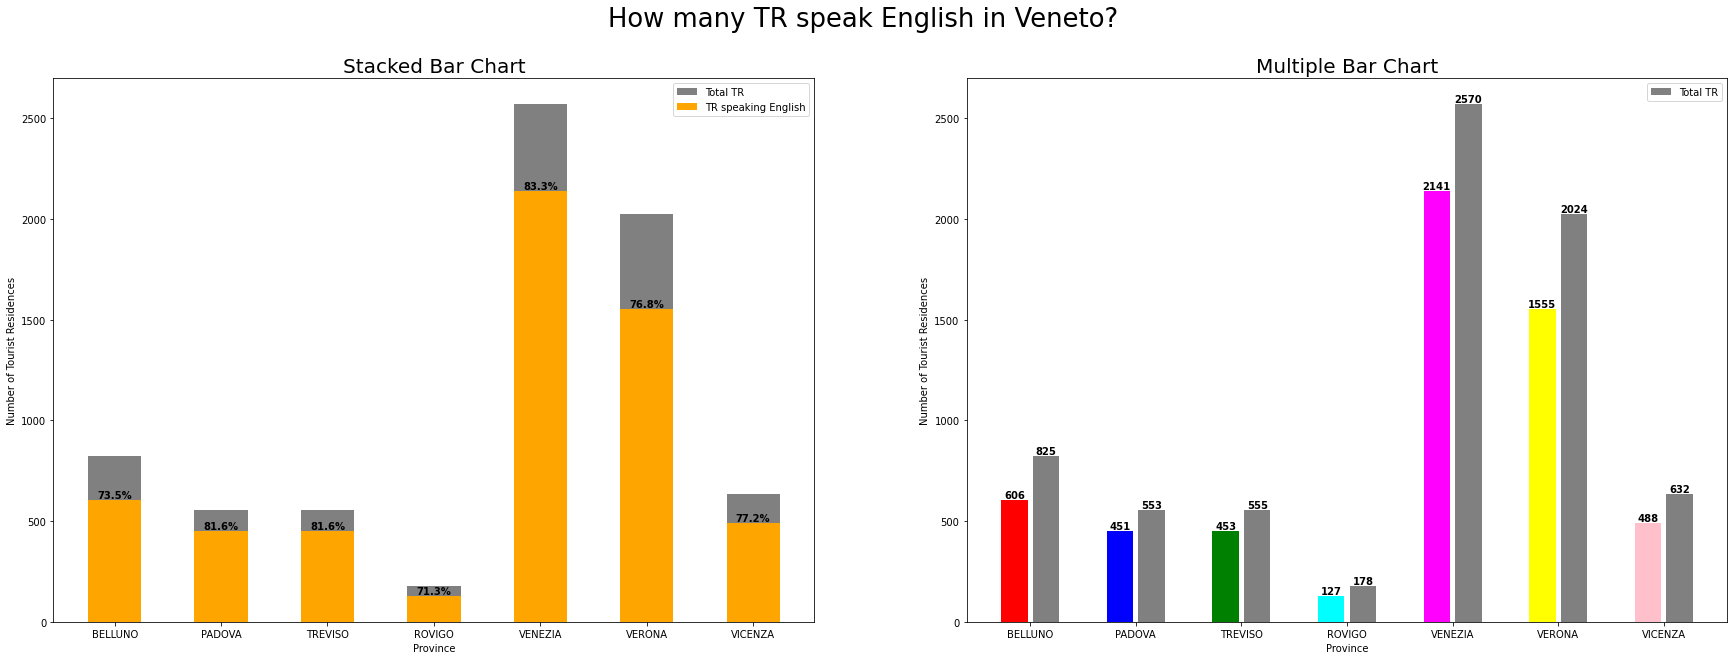

In [184]:
## Stacked Bar Chart

eng_list=[belluno_eng_tr, padova_eng_tr, treviso_eng_tr, rovigo_eng_tr, venezia_eng_tr, verona_eng_tr, vicenza_eng_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR speak English in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(eng_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], eng_list[i], color='orange', width = 0.5, label='TR speaking English')
    number=round((eng_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], eng_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, eng_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((eng_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

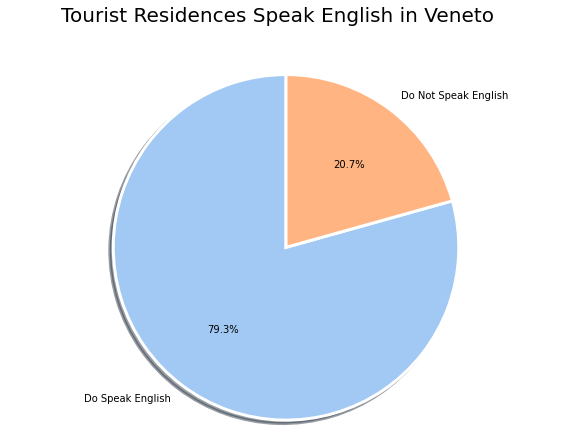

In [185]:
## How many tourist residences speak English in Veneto?

sum_eng = np.sum(eng_list)
total_tr = np.sum(city_len)

ratio_eng_tr = sum_eng/total_tr

labels = ['Do Speak English', 'Do Not Speak English']
sizes = [ratio_eng_tr, 1 - ratio_eng_tr]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("English Speaking Tourist Residences in Veneto", fontsize=20)

plt.show()

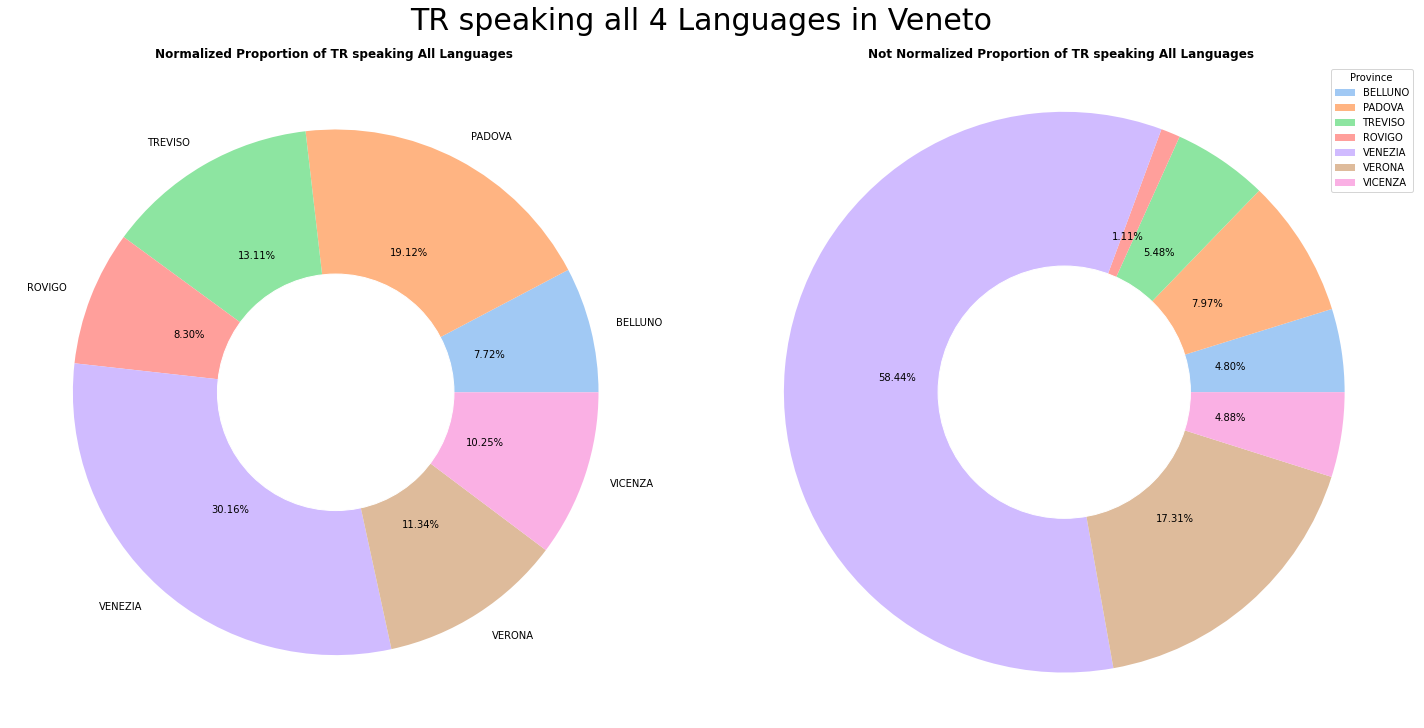

In [228]:
## ALL FOUR LANGUAGES (ENGLISH, SPANISH, GERMAN, FRENCH)
## Definition of 4 Languages
##Tourist residences that speak English, Spanish, German, French refer to accomodations where the staff or management can communicate effectively in multiple languages,
## including English, Spanish, German, and French with the guests. 

belluno_lan_tr = belluno_descriptive.loc['LANGUAGES']
padova_lan_tr = padova_descriptive.loc['LANGUAGES']
treviso_lan_tr = treviso_descriptive.loc['LANGUAGES']
rovigo_lan_tr = rovigo_descriptive.loc['LANGUAGES']
venezia_lan_tr = venezia_descriptive.loc['LANGUAGES']
verona_lan_tr = verona_descriptive.loc['LANGUAGES']
vicenza_lan_tr = vicenza_descriptive.loc['LANGUAGES']

## array with ratio 
lan_array_1 = np.array([belluno_lan_tr/belluno_tr, padova_lan_tr/padova_tr, treviso_lan_tr/treviso_tr, rovigo_lan_tr/rovigo_tr, venezia_lan_tr/venezia_tr, verona_lan_tr/verona_tr, vicenza_lan_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(lan_array_1[np.newaxis])

## array with number 
lan_array_2 = np.array([belluno_lan_tr, padova_lan_tr, treviso_lan_tr, rovigo_lan_tr, venezia_lan_tr, verona_lan_tr, vicenza_lan_tr])
normalized_arr_2 = preprocessing.normalize(lan_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR 
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR speaking All Languages ", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR 
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR speaking All Languages ", fontweight='bold')

fig.suptitle("TR speaking all 4 Languages in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

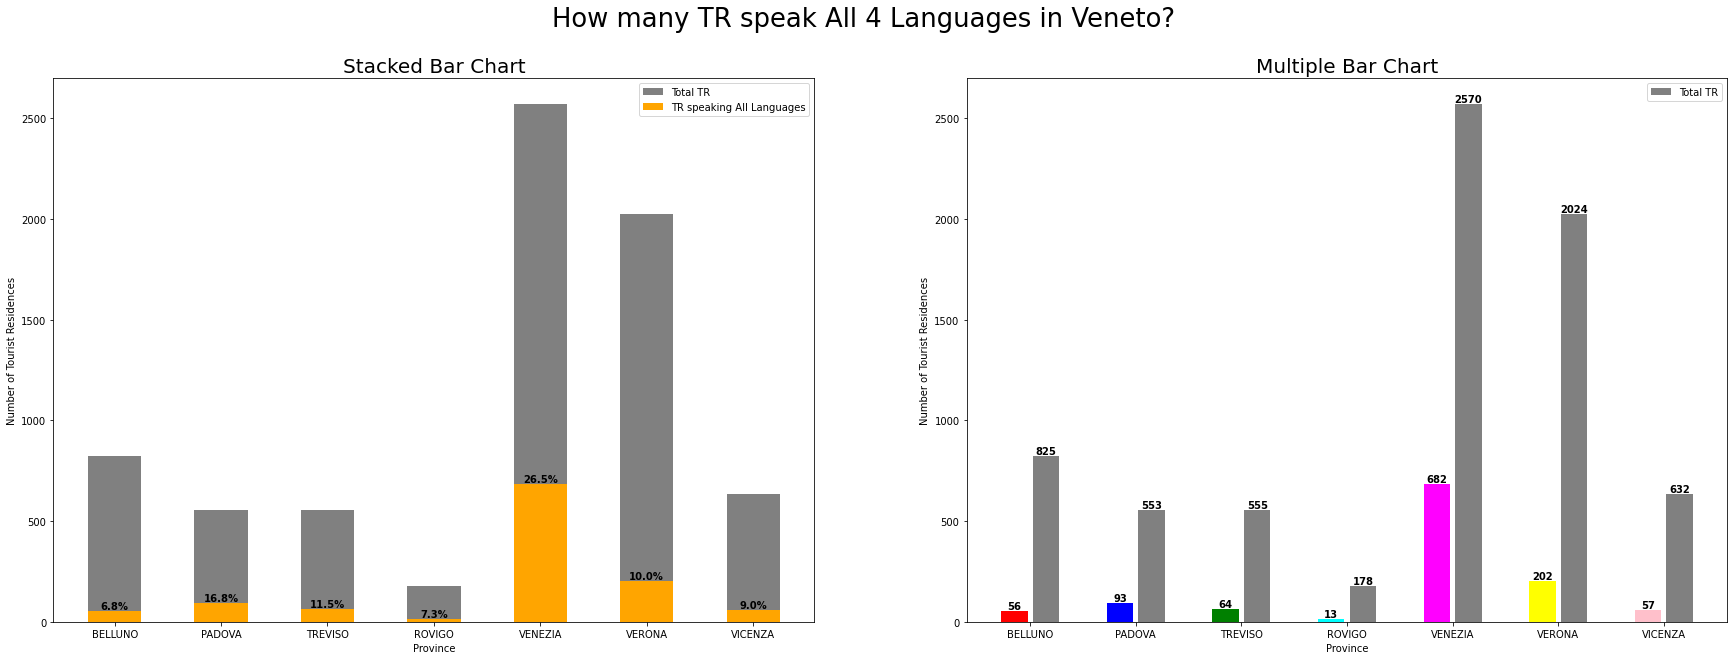

In [229]:
## Stacked Bar Chart

lan_list=[belluno_lan_tr, padova_lan_tr, treviso_lan_tr, rovigo_lan_tr, venezia_lan_tr, verona_lan_tr, vicenza_lan_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR speak All 4 Languages in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(lan_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], lan_list[i], color='orange', width = 0.5, label='TR speaking All Languages')
    number=round((lan_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], lan_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, lan_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((lan_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

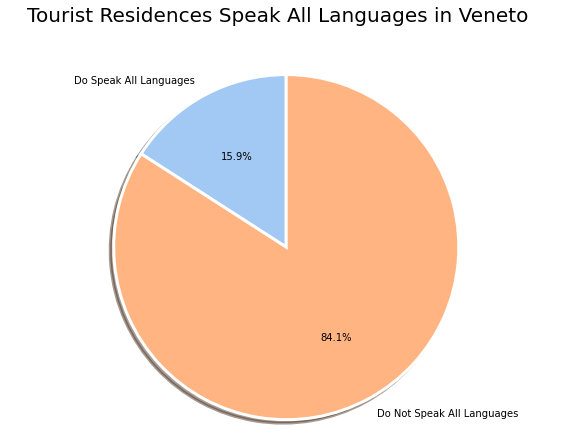

In [188]:
## How many tourist residences speak All Languages in Veneto?

sum_lan = np.sum(lan_list)
total_tr = np.sum(city_len)

ratio_lan_tr = sum_lan/total_tr

labels = ['Do Speak All Languages', 'Do Not Speak All Languages']
sizes = [ratio_lan_tr, 1 - ratio_lan_tr]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences Speak All Languages in Veneto", fontsize=20)

plt.show()

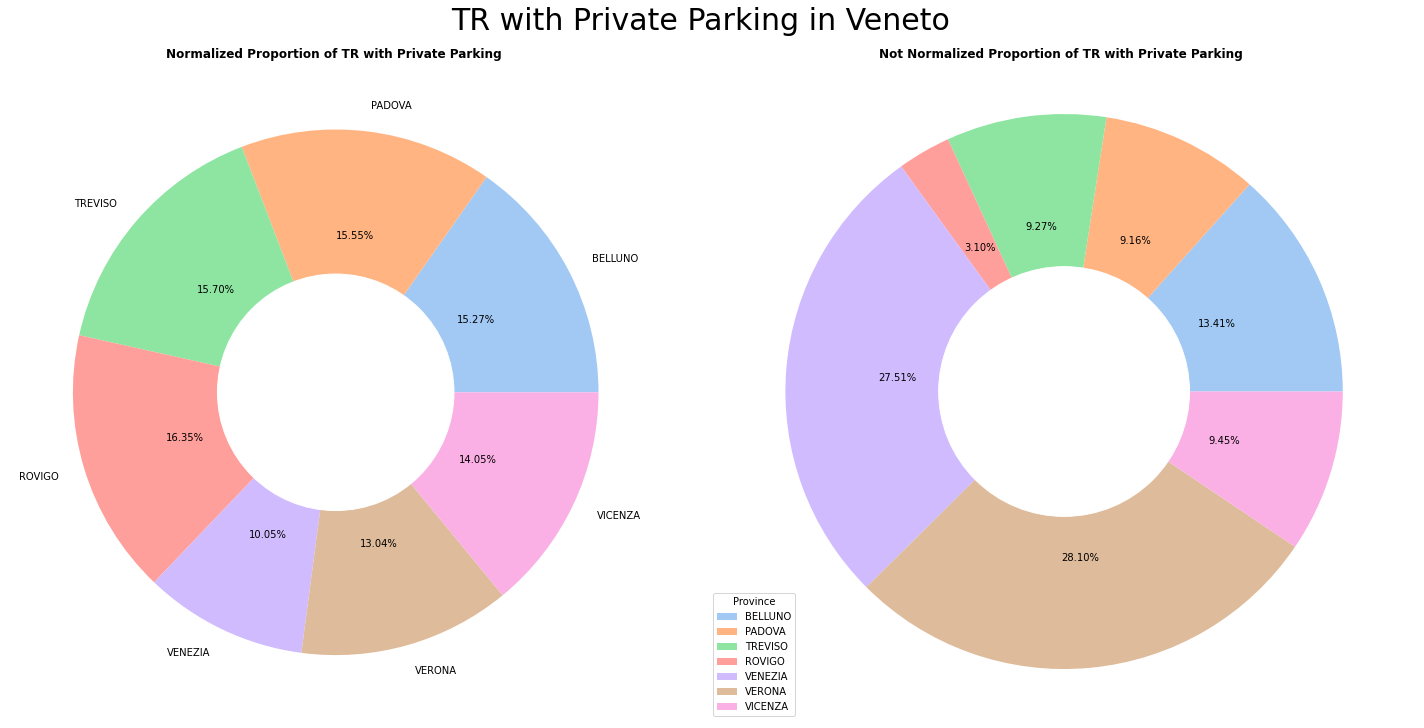

In [189]:
## Parking
## Tourist residences with private parking are accomodations that provide private parking spaces for guests.
## The private parking is a convenience for guests who have rented a vehicle or brought their own, as it provides a secure and convenient place to park.

belluno_park_tr = belluno_descriptive.loc['PARCHEGGIO']
padova_park_tr = padova_descriptive.loc['PARCHEGGIO']
treviso_park_tr = treviso_descriptive.loc['PARCHEGGIO']
rovigo_park_tr = rovigo_descriptive.loc['PARCHEGGIO']
venezia_park_tr = venezia_descriptive.loc['PARCHEGGIO']
verona_park_tr = verona_descriptive.loc['PARCHEGGIO']
vicenza_park_tr = vicenza_descriptive.loc['PARCHEGGIO']

## array with ratio 
park_array_1 = np.array([belluno_park_tr/belluno_tr, padova_park_tr/padova_tr, treviso_park_tr/treviso_tr, rovigo_park_tr/rovigo_tr, venezia_park_tr/venezia_tr, verona_park_tr/verona_tr, vicenza_park_tr/vicenza_tr])
normalized_arr_1 = preprocessing.normalize(park_array_1[np.newaxis])

## array with number
park_array_2 = np.array([belluno_park_tr, padova_park_tr, treviso_park_tr, rovigo_park_tr, venezia_park_tr, verona_park_tr, vicenza_park_tr])
normalized_arr_2 = preprocessing.normalize(park_array_2[np.newaxis])

## create pie charts
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10), constrained_layout = True)
palette = sb.color_palette("pastel")


## normalizing tha array
## In this way i will have an array with normalized values for the two data
data_1 = (normalized_arr_1.T).flatten()
data_2 = (normalized_arr_2.T).flatten()

labels = province

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[0] --> this is the one in which I see the normalizet proportion of TR 
axs[0].pie(data_1, autopct='%.2f%%', labels =labels, colors =palette)
axs[0].add_artist(donut_circle)
axs[0].set_title("Normalized Proportion of TR with Private Parking ", fontweight='bold')

donut_circle = plt.Circle( (0,0), 0.45, color = 'white')

## axs[1] --> this is the axs in which I see the normalized proportion of TR 
axs[1].pie(data_2, autopct='%.2f%%', colors =palette)
axs[1].add_artist(donut_circle)
axs[1].set_title("Not Normalized Proportion of TR with Private Parking ", fontweight='bold')

fig.suptitle("TR with Private Parking in Veneto", fontsize=30)

plt.legend(labels, title='Province')
plt.axis('equal')
plt.show()

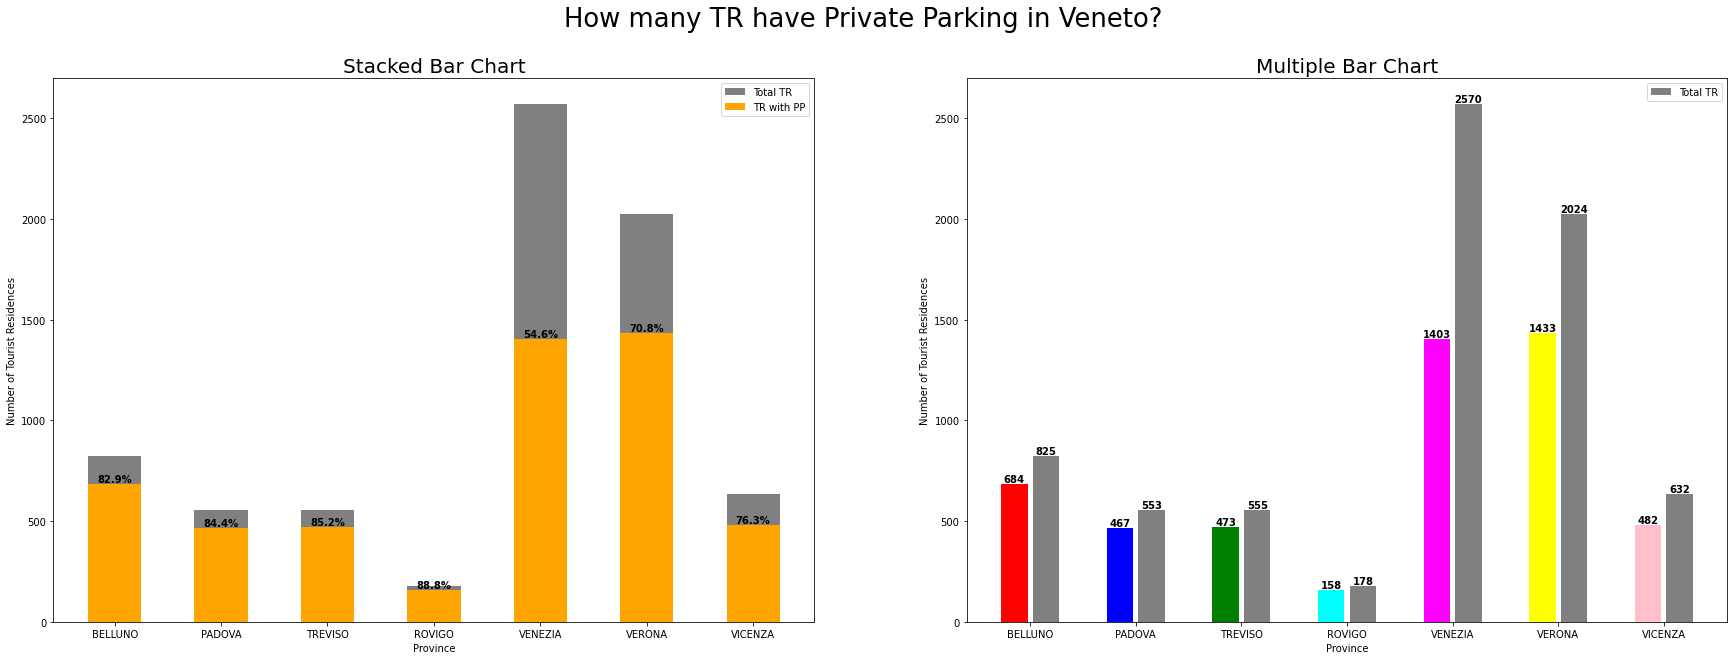

In [190]:
## Stacked Bar Chart

park_list=[belluno_park_tr, padova_park_tr, treviso_park_tr, rovigo_park_tr, venezia_park_tr, verona_park_tr, vicenza_park_tr]

fig, axs = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('How many TR have Private Parking in Veneto?', fontsize=25.9)

axs[0].set_title('Stacked Bar Chart', fontsize=20)
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Number of Tourist Residences')

for i in range(len(park_list)):
    axs[0].bar(province[i], city_len[i], color='grey', width = 0.5, label='Total TR')
    axs[0].bar(province[i], park_list[i], color='orange', width = 0.5, label='TR with PP')
    number=round((park_list[i]/city_len[i])*100,1)
    axs[0].text(province[i], park_list[i], str(number)+'%', ha='center',va= 'bottom', weight='bold')

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[0].legend(by_label.values(), by_label.keys())

## 2nd bar chart ( multiple bar chart)

X=np.arange(7)

data = [city_len, park_list]

axs[1].set_title('Multiple Bar Chart',fontsize=20)
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Number of Tourist Residences')

for i in X:
    axs[1].bar(X[i] - 0.15, data[1][i], width = 0.25, color = list_of_colors[i])
    axs[1].bar(X[i] + 0.15, data[0][i], color = 'grey', width = 0.25, label='Total TR')
    number=round((park_list[i]))
    axs[1].text(X[i] - 0.15, data[1][i], str(number), ha='center',va= 'bottom', weight='bold')
    number=round((city_len[i]))
    axs[1].text(X[i] + 0.15, data[0][i], str(number), ha='center',va= 'bottom', weight='bold')
    

# the following 3 lines are only to avoid legend repetition
handles, labels = axs[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axs[1].legend(by_label.values(), by_label.keys())

## set the name of province in x axis
axs[1].set_xticks(X)
axs[1].set_xticklabels(province)

plt.show()

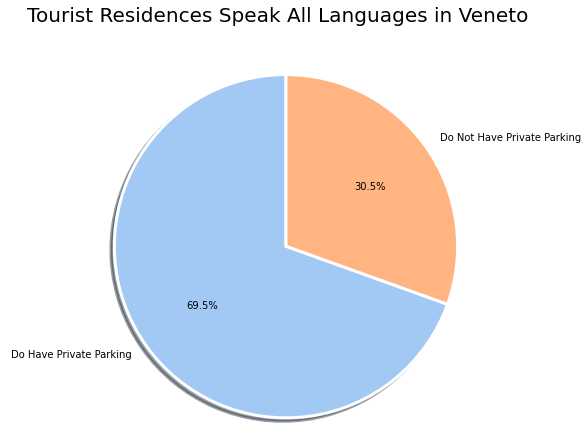

In [191]:
## How many tourist residences have Private Parking in Veneto?

sum_park = np.sum(park_list)
total_tr = np.sum(city_len)


ratio_park_tr = sum_park/total_tr

labels = ['Do Have Private Parking', 'Do Not Have Private Parking']
sizes = [ratio_park_tr, 1 - ratio_park_tr]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=palette)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.suptitle("Tourist Residences Speak All Languages in Veneto", fontsize=20)

plt.show()

##**CORRELATION AND HEATMAP**

There is also a plot that I used in my analysis.

In [ ]:
## need to create under 3, over 3, over 4 TR

tourism_structures_df.info()

In [193]:
tourism_df_to_drop = tourism_structures_df.copy()

In [194]:
## drop the not analyzed variables
tourism_df_ok = tourism_df_to_drop.drop(tourism_df_to_drop.columns[[2,4,6,7,8,9,10,11,12,13,14,16,19,20,21,23,26,27,28,29,30,31,32,33,34,35,36,42,43]], axis=1)

In [ ]:
## Now I have an array with the analyzed descriptive variabes
tourism_df_ok

In [ ]:
## check the infos
tourism_df_ok.info()

In [ ]:
## drop the Nan in classification column
nan_mask = tourism_df_ok['CLASSIFICAZIONE'].isnull()
tr_ok_clear_class_df = tourism_df_ok[nan_mask == False]

tr_ok_clear_class_df.info()

In [ ]:
tr_ok_clear_class_df['CLASSIFICAZIONE'].unique()

In [199]:
## new indexes for the dataframe

new_indexes = []

for i in range(len(tr_ok_clear_class_df)):
  new_indexes.append(i)

tr_ok_clear_class_df.index = new_indexes

In [ ]:
## change classification data, from string to int

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '1 *':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(1)
  elif tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '2 **' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '2 Leoni':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(2)
  elif tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '3 ***' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '3 Leoni' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '3 *** SUPERIOR':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(3)
  elif tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '4 ****' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '4 Leoni' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '4 **** SUPERIOR':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(4)
  elif tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '5 *****' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '5 Leoni' or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == '5 ***** lusso':
    tr_ok_clear_class_df.loc[i, 'CLASSIFICAZIONE'] = int(5)

In [ ]:
## verify 
tr_ok_clear_class_df['CLASSIFICAZIONE'].unique()

In [ ]:
## NEW Classification Columns

under_3_class = []

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 1 or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 2 :
    under_3_class.append(int(1))
  else:
    under_3_class.append(int(0))

class_3_4_5 = []

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 3 or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 4 or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 5 :
    class_3_4_5.append(int(1))
  else:
    class_3_4_5.append(int(0))

class_4_5 = []

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 4 or tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 5 :
    class_4_5.append(int(1))
  else:
    class_4_5.append(int(0))

class_5 = []

for i in range(len(tr_ok_clear_class_df)):
  if tr_ok_clear_class_df['CLASSIFICAZIONE'][i] == 5 :
    class_5.append(int(1))
  else:
    class_5.append(int(0))


tr_ok_clear_class_df['UNDER 3'] = under_3_class
tr_ok_clear_class_df['G.E 3'] = class_3
tr_ok_clear_class_df['G.E. 4'] = class_4
tr_ok_clear_class_df['CLASS 5'] = class_5

In [ ]:
## new df and info

tr_df = tr_ok_clear_class_df

tr_df.info()

In [204]:
## greate a groupby mean and sum by PROVINCIA

tr_groupby_mean = tr_df.groupby(['PROVINCIA']).mean()

tr_groupby_sum = tr_df.groupby(['PROVINCIA']).sum()

In [ ]:
tr_groupby_mean.T

In [ ]:
## classification data by provincia

tr_class = tr_groupby_mean.drop(columns=['PISCINA','RISTORANTE','PARCHEGGIO','SAUNA','FITNESS','ANIMALI AMMESSI','INGLESE','FRANCESE','TEDESCO','SPAGNOLO','CHIUSURA TEMPORANEA '])
tr_class


In [ ]:
## Number of TR wit... by provincia

tr_groupby_sum.T

In [ ]:
tr_class_sum = tr_groupby_sum.drop(columns=['PISCINA','RISTORANTE','PARCHEGGIO','SAUNA','FITNESS','ANIMALI AMMESSI','INGLESE','FRANCESE','TEDESCO','SPAGNOLO','CHIUSURA TEMPORANEA '])
tr_class_sum

In [209]:
## dividing province mean

belluno_class_mean = tr_class.loc['BELLUNO']
padova_class_mean = tr_class.loc['PADOVA']
rovigo_class_mean = tr_class.loc['ROVIGO']
treviso_class_mean = tr_class.loc['TREVISO']
venezia_class_mean = tr_class.loc['VENEZIA']
verona_class_mean = tr_class.loc['VERONA']
vicenza_class_mean = tr_class.loc['VICENZA']

## dividing province sum

belluno_class_sum = tr_class_sum.loc['BELLUNO']
padova_class_sum = tr_class_sum.loc['PADOVA']
rovigo_class_sum = tr_class_sum.loc['ROVIGO']
treviso_class_sum = tr_class_sum.loc['TREVISO']
venezia_class_sum = tr_class_sum.loc['VENEZIA']
verona_class_sum = tr_class_sum.loc['VERONA']
vicenza_class_sum = tr_class_sum.loc['VICENZA']


In [ ]:
## Plotting the different classification TR --> this is the first plot in streamlit

city= input('select_city').upper()

if city == 'BELLUNO':
  plt.figure(figsize=(10,8))
  plt.title('Belluno TR Classification')
  for i in range(len(belluno_class_mean)):
    plt.bar(belluno_class_mean.index[i], belluno_class_sum[i], width= 0.5)
    plt.text(belluno_class_mean.index[i],belluno_class_sum[i], str(round((belluno_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'PADOVA':
  plt.figure(figsize=(10,8))
  plt.title('Padova TR Classification')
  for i in range(len(padova_class_mean)):
    plt.bar(padova_class_mean.index[i], padova_class_sum[i], width= 0.5)
    plt.text(padova_class_mean.index[i],padova_class_sum[i], str(round((padova_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'ROVIGO':
  plt.figure(figsize=(10,8))
  plt.title('Rovigo TR Classification')
  for i in range(len(rovigo_class_mean)):
    plt.bar(rovigo_class_mean.index[i], rovigo_class_sum[i], width= 0.5)
    plt.text(rovigo_class_mean.index[i],rovigo_class_sum[i], str(round((rovigo_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'TREVISO':
  plt.figure(figsize=(10,8))
  plt.title('Treviso TR Classification')
  for i in range(len(treviso_class_mean)):
    plt.bar(treviso_class_mean.index[i], treviso_class_sum[i], width= 0.5)
    plt.text(treviso_class_mean.index[i],treviso_class_sum[i], str(round((treviso_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'VENEZIA':
  plt.figure(figsize=(10,8))
  plt.title('Venezia TR Classification')
  for i in range(len(venezia_class_mean)):
    plt.bar(venezia_class_mean.index[i], venezia_class_sum[i], width= 0.5)
    plt.text(venezia_class_mean.index[i],venezia_class_sum[i], str(round((venezia_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'VERONA':
  plt.figure(figsize=(10,8))
  plt.title('Verona TR Classification')
  for i in range(len(verona_class_mean)):
    plt.bar(verona_class_mean.index[i], verona_class_sum[i], width= 0.5)
    plt.text(verona_class_mean.index[i],verona_class_sum[i], str(round((verona_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

elif city == 'VICENZA':
  plt.figure(figsize=(10,8))
  plt.title('Vicenza TR Classification')
  for i in range(len(vicenza_class_mean)):
    plt.bar(vicenza_class_mean.index[i], vicenza_class_sum[i], width= 0.5)
    plt.text(vicenza_class_mean.index[i],vicenza_class_sum[i], str(round((vicenza_class_mean[i])*100,2))+'%', ha='center',va= 'bottom', weight='bold')

else:
  print('City not found!')

plt.show()

In [ ]:
## Adding language

language=[]
for i in range(len(tr_df)):
  if (tr_df['INGLESE'][i] == 1) & (tr_df['TEDESCO'][i] == 1) & (tr_df['SPAGNOLO'][i] == 1) & (tr_df['FRANCESE'][i] == 1) :
    language.append(1)
  else:
    language.append(0)

tr_df['LANGUAGES'] = language


In [ ]:
## CORRELATION
tr_df.corr()

In [ ]:
## HEATMAP

plt.figure(figsize=(20,12))
sb.heatmap(tr_df.corr(), annot=True)

In [ ]:
tr_df

In [ ]:
## checking null values

tr_df.isnull().sum()

In [ ]:
tr_df.drop(columns=['PROVINCIA','COMUNE','TIPOLOGIA','DENOMINAZIONE','CLASSIFICAZIONE'])

In [223]:
tr_df.columns

Index(['PROVINCIA', 'COMUNE', 'TIPOLOGIA', 'DENOMINAZIONE', 'PISCINA',
       'RISTORANTE', 'PARCHEGGIO', 'SAUNA', 'FITNESS', 'ANIMALI AMMESSI',
       'INGLESE', 'FRANCESE', 'TEDESCO', 'SPAGNOLO', 'CHIUSURA TEMPORANEA ',
       'CLASSIFICAZIONE', 'UNDER 3', 'G.E 3', 'G.E. 4', 'CLASS 5',
       'LANGUAGES'],
      dtype='object')

##**MODEL**

In [224]:
## linear regression

import sklearn
from sklearn.linear_model import LinearRegression

y_under_3 = tr_df['G.E. 4']
y_over_3 = tr_df['CLASS 5']

x_english = tr_df['INGLESE']
x_pool = tr_df['PISCINA']

X = tr_df[['INGLESE','PISCINA','PARCHEGGIO','FITNESS','SAUNA','RISTORANTE']]

reg=LinearRegression().fit(X,y_under_3)

intercept_label = ['intercept']
coeff_df = pd.DataFrame([*intercept_label,*X.columns])
coeff_df.columns = ['Predictors']
coeff_df['Coefficients'] = [*[reg.intercept_], *reg.coef_]

coeff_df



,Predictors,Coefficients
0,intercept,-0.002288
1,INGLESE,0.043079
2,PISCINA,0.100884
3,PARCHEGGIO,-0.021426
4,FITNESS,0.191748
5,SAUNA,0.053326
6,RISTORANTE,0.067719
